In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn import svm

In [42]:
data = pd.read_csv("spam_Emails_data.csv", sep = ',')

In [43]:
data

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...
...,...,...
193847,Ham,on escapenumber escapenumber escapenumber rob ...
193848,Spam,we have everything you need escapelong cialesc...
193849,Ham,hi quick question say i have a date variable i...
193850,Spam,thank you for your loan request which we recie...


In [44]:
data = data[0:50000]

In [45]:
data.isnull().sum()

label    0
text     1
dtype: int64

In [46]:
data = data.dropna(subset = ['label', 'text']).reset_index(drop = True)

In [47]:
data['text'] = data['text'].str.lower()

X = data['text']
Y = data['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [48]:
vectorizer = TfidfVectorizer()

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [49]:
sc = StandardScaler(with_mean=False)

X_train_scaled = sc.fit_transform(X_train_vectorized)
X_test_scaled = sc.transform(X_test_vectorized)

In [54]:
import time
start_time = time.time()

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, Y_train)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")


Training time: 4055.9757282733917 seconds


Accuracy: 0.952
Classification Report:
              precision    recall  f1-score   support

         Ham       0.95      0.96      0.95      5207
        Spam       0.95      0.95      0.95      4793

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



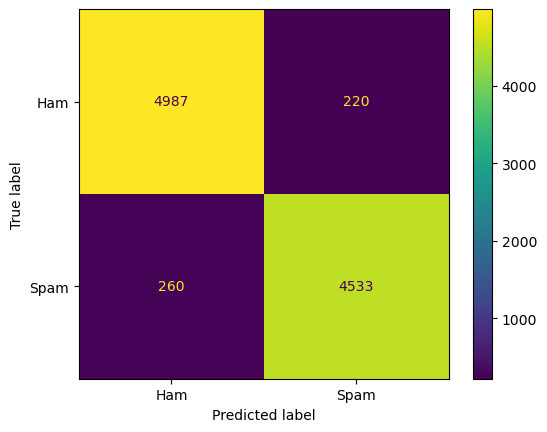

In [51]:
y_pred = svm_classifier.predict(X_test_scaled)

accuracy = accuracy_score(Y_test, y_pred)
conf_m = confusion_matrix(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

print(f"Accuracy: {accuracy}")

print(f"Classification Report:")
print(report)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=svm_classifier.classes_)
disp.plot()
plt.show()

<Axes: xlabel='Dim_1', ylabel='Dim_2'>

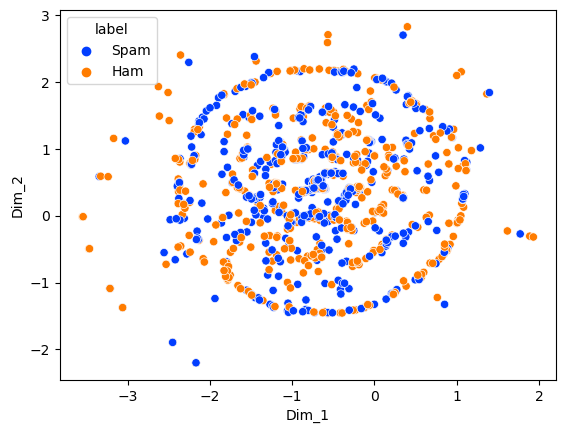

In [52]:
labels = data['label']

data_1000 = X_train_scaled[0:1000, :]
labels_1000 = labels[0:1000]
 
model1 = TSNE(n_components = 2, random_state = 0, init = 'random')
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000
 
tsne_data = model1.fit_transform(data_1000)
 
# creating a new data frame which
# help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns =("Dim_1", "Dim_2", "label"))
 
# Plotting the result of tsne
sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")

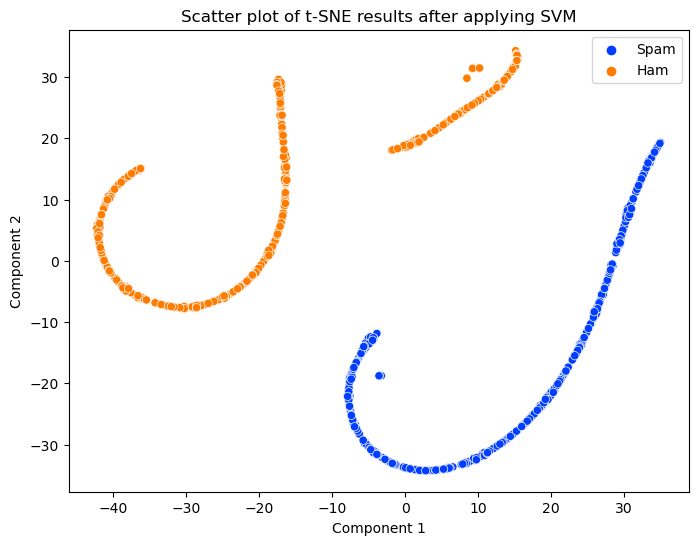

In [53]:
model2 = svm.SVC(kernel='linear', probability=True)
model2.fit(data_1000, labels_1000)

# Get the model's predictions or transformed features (replace with your features)
transformed_data = model2.predict_proba(data_1000)

# Configure and fit t-SNE with init="random"
tsne_model = TSNE(n_components=2, random_state=0, init='random')
tsne_data = tsne_model.fit_transform(transformed_data)

# Create a new DataFrame for the result
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Plotting the result of t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Scatter plot of t-SNE results after applying SVM")
plt.legend()
plt.show()

<__array_function__ internals>:200: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
<__array_function__ internals>:200: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.


TypeError: unhashable type: 'csr_matrix'

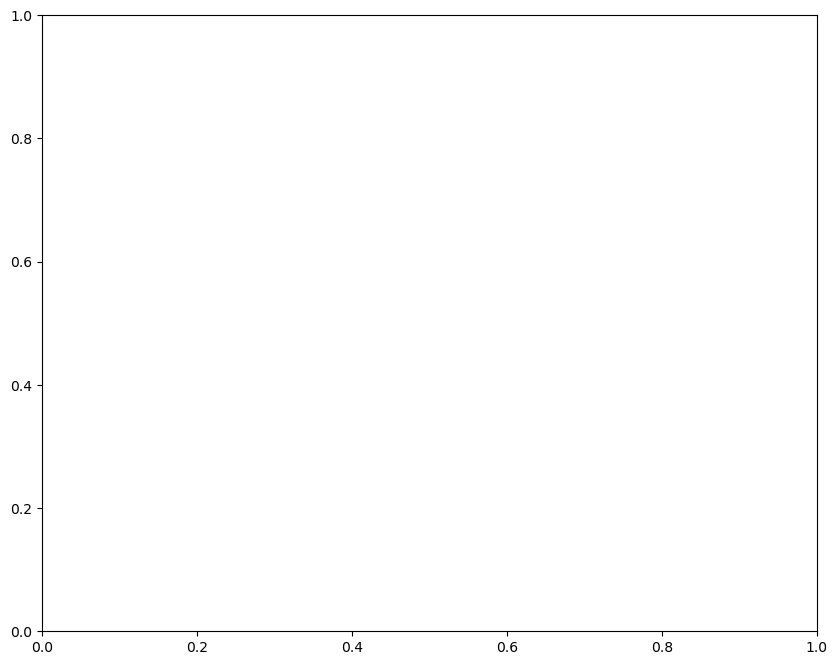

In [56]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=Y_train, s=8)

# Constructing a hyperplane using a formula.
w = model2.coef_[0]  # w consists of 2 elements
b = model2.intercept_[0]  # b consists of 1 element
x_points = np.linspace(X_train_scaled[:, 0].min(), X_train_scaled[:, 0].max())  # generating x-points
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
plt.plot(x_points, y_points, c='r')
plt.show()